In [4]:
import base64
import binascii
import struct
import os
import sys
from Crypto.Util.number import bytes_to_long 
import pandas as pd
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


In [5]:
path = os.path.join(sys.path[0], "preprocess-2rotated\\")
# text_file = open(file, "rb")
for fi in os.listdir(path):
    if file.endswith(".lvx"):
        print(os.path.join(path, fi))

In [3]:
def is_eof(f):
  s = f.read(1)
  if s != b'':    # restore position
    f.seek(-1, os.SEEK_CUR)
  return s == b''

In [4]:
def Rbyte(numByte,f,s):
    i = 0
    buff = bytearray()
    byte = f.read(1)
    buff.extend(byte)
    temp = ''
    while (byte != b"" and i<numByte-1):
        # Do stuff with byte.
        byte = f.read(1)
        buff += byte
        i+=1
    #print(buff)
    #print(s)
    #print( int.from_bytes(buff[0:1],"little"), int.from_bytes(buff[2:3],"little"))
    if(s == "skp"):
        return 0;
    if(s == 's'):
        return buff.decode("utf-8") 
    if(s == 'a'):
        return buff.decode("ascii") 
    if(s == 'i'): 
        return int.from_bytes(buff,"little",signed="True")
    if(s == 'ui'): 
        #print(buff, "integer")
        return int.from_bytes(buff,"little",signed="False")
    if(s == 'i32'): 
        tmp = bytearray([0,0,0,0,0,0,0,0]).extend(buff)
        return int.from_bytes(tmp,"little")
    if(s == 'b'):
        return binascii.b2a_hex(buff)
    if(s == 'f'):
        return struct.unpack('f', buff)
    if(s == 'l'):
        return int.from_bytes(buff, byteorder='little', signed=False)
    if(s == 'uc'):
        if(len(buff) == 1):
            temp = struct.unpack('B', buff)[0]
        else:
            for i in range(len(buff)):
                sct = struct.unpack('B', buff[i:i+1])
                temp += str(sct[0])
        return temp

In [5]:
def removepara(s):
    s = s.replace('(', '')
    s = s.replace(')', '')
    return s

In [6]:
fps = 1

In [12]:
s = 's'
it = 'i'
ui = 'ui'
b = 'b'
a = 'a'
fl = 'f'
l = 'l'
uc = 'uc'
skp = 'skp'
i32 = 'i32'
ptcd = []
with open(file, "rb") as f:
    print("Sig",Rbyte(16,f,s))
    print("A",Rbyte(1,f,uc))
    print("B",Rbyte(1,f,uc))
    print("C",Rbyte(1,f,uc))
    print("D",Rbyte(1,f,uc))
    #Rbyte(20,f,skp)
    print("CODE",Rbyte(4,f,b))
    print("Frame Duration",Rbyte(4,f,ui))
    deviceCount = Rbyte(1,f,uc)
    print("Device_Count",deviceCount)
    for i in range(deviceCount):
#         print("Device " + str(i) + " info:")
#         print("Lidar SN Code: ", Rbyte(16,f,s))
#         print("Hub SN Code: ", Rbyte(16,f,b))
#         print("Device index: ", Rbyte(1,f,uc))
#         print("Device Type: ", Rbyte(1,f,uc))
#         print("Extrinsic Enable",Rbyte(1,f,uc))
#         print("Roll: ", Rbyte(4,f,fl))
#         print("Pitch: ", Rbyte(4,f,fl))
#         print("Yaw: ", Rbyte(4,f,fl))
#         print("X: ", Rbyte(4,f,fl))
#         print("Y: ", Rbyte(4,f,fl))
#         print("Z: ", Rbyte(4,f,fl))
        Rbyte(59,f,skp)
    num = 0
    frame = 0
    while(not is_eof(f)):
        frame+=1
        curr = Rbyte(8,f,l)
        nxt = Rbyte(8,f,l)
        #print("Current Offset ",curr)
        #print("Next Offset: ", nxt)
        #print("Frame Index: ", Rbyte(8,f,l))
        Rbyte(8,f,skp)
        #Rbyte(24,f,skp)
        #Pck = Rbyte(8,f,l)
        #print("Package Count: ", Pck)
        num = curr
        num+=24
        if(frame%fps == 0):
            op=open("C:\\Users\\usaru\\OneDrive\\Desktop\\school\\Senior design project\\Data\\Single lidar data\\Collected\\ToSort\\150ms\\run1\\"+ str(frame//fps) +".csv", 'w')
            op.close()
#         print(frame//fps)
        while(num < nxt):
#             print("Device Index ", Rbyte(1,f,uc))
#             print("Version: ", Rbyte(1,f,uc))
#             print("Slot ID: ", Rbyte(1,f,uc))
#             print("Lidar ID ", Rbyte(1,f,uc))
            Rbyte(4,f,skp)
            res = Rbyte(1,f,b)
            #print("Reserved: ", res)
            if(res != binascii.b2a_hex(bytes.fromhex('00'))):
                print("error @",i)
                raise Exception("reserved not 00")
#             print("Status Code : ", Rbyte(4,f,b))
#             print("TimeStamp Type ", Rbyte(1,f,b))
#             print("Time Stamp : ", Rbyte(8,f,b))
            Rbyte(13,f,skp)
            DataType = Rbyte(1,f,uc)
            #print("Data Type: ", DataType)
            ptcd = []
            num+=19
            #print(num)
            for j in range(100):
                ar = [(Rbyte(4,f,it)/1000),(Rbyte(4,f,it)/1000),(Rbyte(4,f,it)/1000),(Rbyte(1,f,it))]
                ptcd.append(ar)
                print(ar)
                num+=13
            with open("C:\\Users\\usaru\\OneDrive\\Desktop\\school\\Senior design project\\Data\\Single lidar data\\Collected\\ToSort\\150ms\\run1\\"+ str(frame//fps) +".csv", 'a') as file_handler:
                for arr in ptcd:
                    file_handler.write(removepara(str(arr[0]))+ "," + removepara(str(arr[1]))+ "," + removepara(str(arr[2]))+ "," + removepara(str(arr[3])) + "\n")
            #print(num,nxt)
        num+=1
    print(num)

Sig livox_tech      
A 1
B 1
C 0
D 0
CODE b'67a70eac'
Frame Duration 50
Device_Count 1
[17.171, 3.034, 4.899, 6]
[17.142, 3.038, 4.89, 6]
[17.124, 3.045, 4.883, 6]
[17.083, 3.047, 4.868, 7]
[17.049, 3.051, 4.856, 7]
[17.037, 3.058, 4.85, 7]
[17.0, 3.06, 4.837, 7]
[16.97, 3.063, 4.824, 7]
[16.943, 3.068, 4.814, 7]
[16.919, 3.072, 4.803, 7]
[16.896, 3.076, 4.794, 7]
[16.862, 3.078, 4.78, 8]
[16.814, 3.078, 4.762, 9]
[16.779, 3.08, 4.748, 7]
[16.763, 3.085, 4.739, 7]
[16.712, 3.083, 4.72, 7]
[16.676, 3.084, 4.704, 8]
[16.628, 3.083, 4.686, 7]
[16.59, 3.083, 4.67, 7]
[16.548, 3.082, 4.652, 8]
[16.501, 3.08, 4.634, 8]
[16.471, 3.082, 4.619, 8]
[16.431, 3.082, 4.601, 8]
[16.392, 3.081, 4.585, 8]
[16.327, 3.075, 4.56, 7]
[16.289, 3.075, 4.542, 9]
[16.247, 3.072, 4.524, 7]
[16.204, 3.071, 4.505, 9]
[16.152, 3.066, 4.484, 8]
[16.101, 3.062, 4.462, 9]
[16.059, 3.06, 4.443, 7]
[16.006, 3.054, 4.421, 7]
[15.957, 3.051, 4.399, 7]
[15.922, 3.05, 4.382, 7]
[15.867, 3.043, 4.358, 8]
[15.826, 3.041, 4.

[4.12, -0.369, -1.378, 18]
[4.121, -0.37, -1.375, 18]
[4.125, -0.372, -1.374, 17]
[4.132, -0.374, -1.374, 18]
[4.133, -0.376, -1.37, 18]
[4.139, -0.378, -1.369, 17]
[4.14, -0.379, -1.367, 24]
[4.151, -0.382, -1.367, 19]
[4.156, -0.384, -1.365, 17]
[4.161, -0.386, -1.363, 17]
[4.162, -0.387, -1.36, 17]
[4.173, -0.389, -1.36, 18]
[4.179, -0.39, -1.358, 18]
[4.18, -0.391, -1.355, 25]
[4.183, -0.393, -1.353, 25]
[4.193, -0.395, -1.352, 25]
[4.203, -0.397, -1.351, 17]
[4.206, -0.398, -1.348, 17]
[4.218, -0.4, -1.348, 17]
[4.222, -0.402, -1.345, 17]
[4.226, -0.403, -1.343, 17]
[4.229, -0.404, -1.34, 18]
[4.242, -0.407, -1.34, 18]
[4.245, -0.408, -1.337, 18]
[4.253, -0.41, -1.334, 18]
[4.261, -0.411, -1.333, 19]
[4.266, -0.412, -1.33, 27]
[4.28, -0.415, -1.33, 20]
[4.283, -0.416, -1.327, 19]
[4.288, -0.417, -1.323, 18]
[4.291, -0.418, -1.32, 17]
[4.298, -0.419, -1.317, 23]
[4.308, -0.421, -1.316, 23]
[4.307, -0.421, -1.311, 23]
[4.314, -0.422, -1.308, 23]
[4.323, -0.424, -1.306, 23]
[4.331, -

[13.159, 0.097, 2.427, 7]
[13.047, 0.098, 2.384, 7]
[12.928, 0.099, 2.339, 7]
[12.83, 0.1, 2.299, 8]
[12.718, 0.101, 2.255, 8]
[12.613, 0.103, 2.213, 7]
[12.5, 0.103, 2.171, 7]
[12.405, 0.104, 2.132, 7]
[12.296, 0.105, 2.091, 9]
[12.179, 0.105, 2.048, 9]
[12.097, 0.106, 2.012, 7]
[12.004, 0.106, 1.974, 9]
[11.914, 0.106, 1.938, 9]
[11.823, 0.107, 1.901, 7]
[11.735, 0.107, 1.865, 8]
[11.664, 0.107, 1.832, 8]
[11.583, 0.107, 1.797, 8]
[11.506, 0.107, 1.764, 8]
[11.428, 0.107, 1.73, 9]
[11.339, 0.107, 1.695, 8]
[11.246, 0.107, 1.659, 8]
[11.184, 0.107, 1.628, 8]
[11.107, 0.107, 1.596, 7]
[11.034, 0.106, 1.565, 6]
[10.931, 0.106, 1.529, 6]
[10.858, 0.105, 1.498, 9]
[10.803, 0.105, 1.469, 8]
[10.728, 0.105, 1.438, 8]
[10.656, 0.104, 1.408, 8]
[10.578, 0.103, 1.377, 9]
[10.499, 0.102, 1.346, 10]
[10.419, 0.102, 1.315, 12]
[10.346, 0.101, 1.286, 13]
[10.293, 0.1, 1.259, 13]
[10.229, 0.099, 1.231, 12]
[10.179, 0.098, 1.205, 10]
[10.115, 0.097, 1.177, 9]
[10.038, 0.097, 1.148, 8]
[9.967, 0.095,

[12.823, -0.248, 2.19, 9]
[12.935, -0.249, 2.233, 8]
[13.036, -0.25, 2.274, 9]
[13.146, -0.252, 2.317, 8]
[13.254, -0.253, 2.359, 9]
[13.371, -0.254, 2.404, 8]
[13.483, -0.255, 2.449, 8]
[13.594, -0.256, 2.493, 8]
[13.705, -0.256, 2.539, 8]
[13.796, -0.257, 2.58, 10]
[13.922, -0.257, 2.629, 9]
[14.047, -0.259, 2.676, 9]
[14.153, -0.259, 2.721, 9]
[14.278, -0.259, 2.771, 9]
[14.384, -0.26, 2.816, 8]
[14.501, -0.259, 2.865, 9]
[14.616, -0.259, 2.912, 9]
[14.734, -0.259, 2.961, 10]
[14.86, -0.26, 3.012, 10]
[14.958, -0.258, 3.058, 10]
[15.088, -0.258, 3.111, 10]
[15.211, -0.257, 3.161, 10]
[15.352, -0.257, 3.216, 11]
[15.467, -0.256, 3.266, 10]
[15.602, -0.256, 3.321, 9]
[15.733, -0.255, 3.375, 9]
[15.899, -0.254, 3.437, 10]
[16.158, -0.256, 3.519, 23]
[16.324, -0.255, 3.582, 51]
[16.393, -0.252, 3.624, 62]
[16.46, -0.25, 3.666, 64]
[16.53, -0.247, 3.708, 54]
[16.677, -0.245, 3.768, 26]
[16.832, -0.243, 3.829, 16]
[17.053, -0.242, 3.906, 11]
[17.218, -0.241, 3.972, 10]
[17.375, -0.239, 4.

[3.873, 0.321, -1.34, 33]
[3.871, 0.32, -1.341, 32]
[3.866, 0.317, -1.341, 31]
[3.865, 0.315, -1.342, 31]
[3.864, 0.312, -1.341, 32]
[3.865, 0.311, -1.343, 31]
[3.861, 0.309, -1.343, 33]
[3.864, 0.307, -1.344, 31]
[3.862, 0.304, -1.345, 31]
[3.865, 0.303, -1.347, 31]
[3.865, 0.301, -1.348, 31]
[3.865, 0.299, -1.348, 30]
[3.863, 0.297, -1.348, 30]
[3.867, 0.294, -1.35, 29]
[3.867, 0.292, -1.351, 29]
[3.863, 0.29, -1.35, 30]
[3.865, 0.288, -1.35, 30]
[3.863, 0.286, -1.35, 30]
[3.863, 0.284, -1.351, 30]
[3.863, 0.282, -1.35, 30]
[3.862, 0.279, -1.35, 31]
[3.863, 0.277, -1.351, 30]
[3.862, 0.274, -1.351, 31]
[3.863, 0.272, -1.351, 31]
[3.865, 0.27, -1.351, 31]
[3.865, 0.268, -1.351, 31]
[3.866, 0.266, -1.352, 31]
[3.866, 0.264, -1.352, 31]
[3.875, 0.262, -1.355, 32]
[3.869, 0.26, -1.352, 30]
[3.87, 0.258, -1.352, 30]
[3.878, 0.255, -1.354, 32]
[3.878, 0.253, -1.353, 32]
[3.879, 0.251, -1.353, 31]
[3.873, 0.248, -1.351, 29]
[3.88, 0.246, -1.353, 31]
[3.881, 0.244, -1.352, 31]
[3.882, 0.241,

[20.006, -2.267, 4.664, 9]
[19.739, -2.218, 4.58, 11]
[19.548, -2.179, 4.513, 14]
[19.448, -2.15, 4.469, 17]
[19.407, -2.127, 4.438, 17]
[19.416, -2.111, 4.417, 16]
[19.434, -2.093, 4.399, 16]
[19.427, -2.075, 4.374, 15]
[19.388, -2.054, 4.342, 13]
[19.323, -2.029, 4.304, 14]
[19.19, -1.997, 4.252, 13]
[19.047, -1.964, 4.197, 14]
[18.859, -1.927, 4.131, 14]
[18.677, -1.892, 4.069, 14]
[18.509, -1.858, 4.01, 13]
[18.345, -1.825, 3.95, 12]
[18.161, -1.79, 3.887, 12]
[17.973, -1.755, 3.825, 10]
[17.798, -1.721, 3.765, 10]
[17.627, -1.689, 3.705, 11]
[17.473, -1.658, 3.649, 11]
[17.31, -1.627, 3.593, 11]
[17.14, -1.595, 3.535, 10]
[16.969, -1.564, 3.477, 10]
[16.785, -1.532, 3.417, 10]
[16.592, -1.5, 3.355, 10]
[16.445, -1.471, 3.302, 9]
[16.295, -1.443, 3.25, 11]
[16.102, -1.411, 3.189, 13]
[15.937, -1.382, 3.134, 19]
[15.823, -1.358, 3.089, 27]
[15.746, -1.337, 3.052, 24]
[15.619, -1.313, 3.005, 22]
[15.466, -1.286, 2.953, 14]
[15.293, -1.258, 2.898, 9]
[15.139, -1.232, 2.847, 8]
[15.001

[9.217, -0.474, 0.629, 8]


In [8]:
df=pd.read_csv(os.path.join(sys.path[0], "Collected\\ToSort\\150ms\\run1\\1.csv"), sep=',',header=None)
n = df.to_numpy()
y = n[:,0]
x = n[:,1]
z = n[:,2]
intensity = n[:,3]

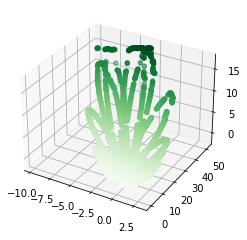

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='Greens');

In [10]:
# for i in range(200):
#     df=pd.read_csv(os.path.join(sys.path[0], "Collected\\ToSort\\150ms\\run1\\"+ str(i) +".csv"), sep=',',header=None)
#     n = df.to_numpy()
#     y = n[:,0]
#     x = n[:,1]
#     z = n[:,2]
#     intensity = n[:,3]
#     fig = plt.figure()
#     ax = plt.axes(projection='3d')
#     ax.scatter3D(x, y, z, c=z, cmap='Greens');